# Load Data

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [169]:
df = pd.read_csv('../data/raw/titanic.csv')

# Data Overview

## Shape

In [170]:
df.shape

(891, 12)

## head()

In [171]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## info()

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## describe()

In [173]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## isnull()

In [174]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
df['Survived'].value_counts()/len(df) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

# Split Data

In [176]:
y = df['Survived']
X = df

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Data Quality Assessment

In [178]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [179]:
X_train.duplicated().sum()

np.int64(0)

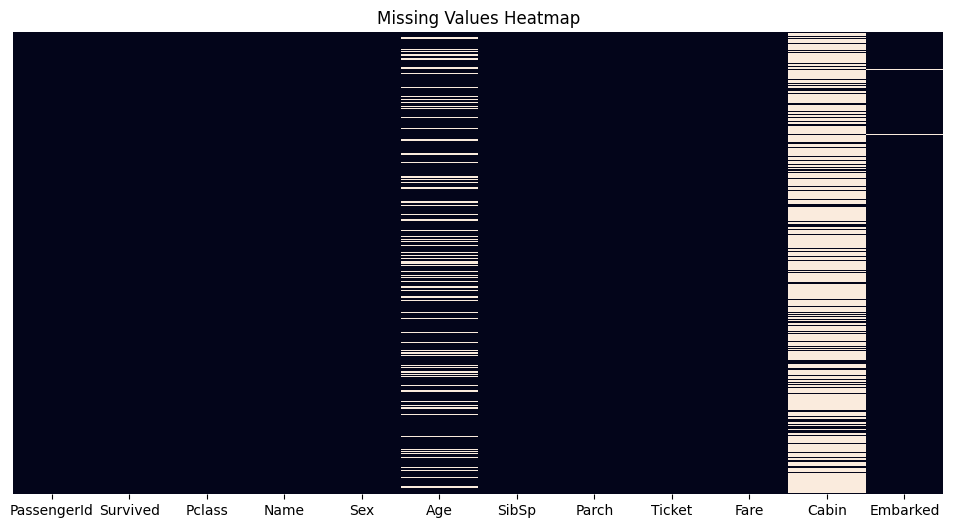

In [180]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Univariate Analysis

## Survived

In [181]:
X_train['Survived'].value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [182]:
X_train['Survived'].value_counts() / len(df) * 100

Survived
0    49.831650
1    30.078563
Name: count, dtype: float64

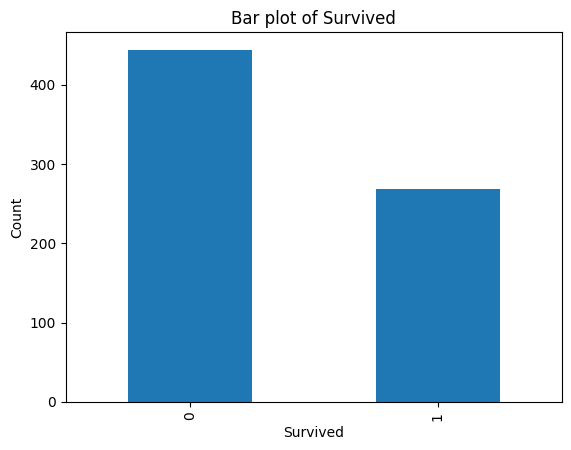

In [183]:
X_train['Survived'].value_counts().plot(kind='bar')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived')
plt.show()


In [184]:
X_train['Survived'].mean()

np.float64(0.37640449438202245)

## Pclass

In [185]:
X_train['Pclass'].value_counts()

Pclass
3    398
1    163
2    151
Name: count, dtype: int64

In [186]:
X_train['Pclass'].value_counts() / len(X_train) * 100

Pclass
3    55.898876
1    22.893258
2    21.207865
Name: count, dtype: float64

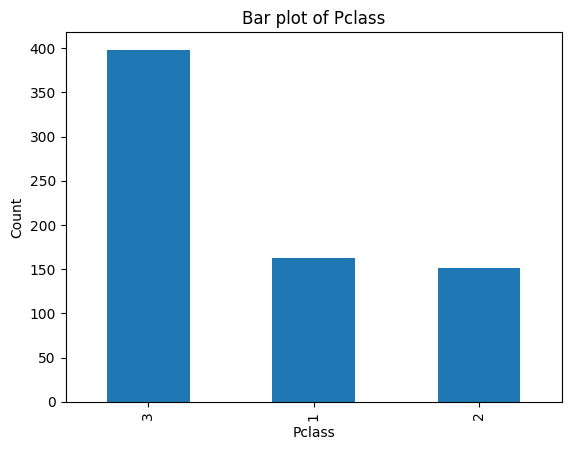

In [187]:
X_train['Pclass'].value_counts().plot(kind='bar')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Bar plot of Pclass')
plt.show()

## Sex

In [188]:
X_train['Sex'].value_counts()

Sex
male      467
female    245
Name: count, dtype: int64

In [189]:
X_train['Sex'].value_counts() / len(X_train) * 100

Sex
male      65.589888
female    34.410112
Name: count, dtype: float64

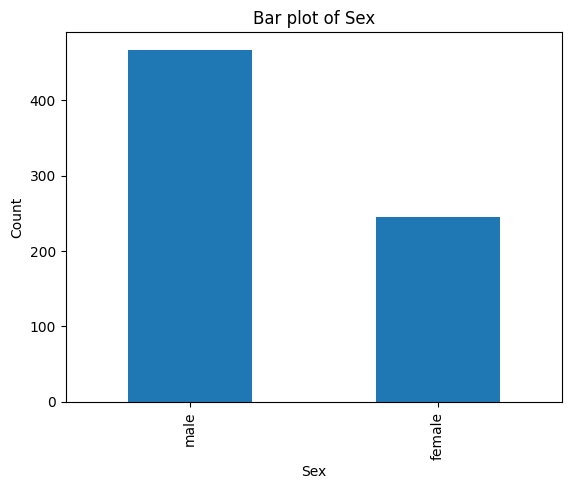

In [190]:
X_train['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar plot of Sex')
plt.show()

## Age

In [191]:
X_train['Age'].describe()

count    572.000000
mean      29.498846
std       14.500059
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [192]:
X_train['Age'].median()

np.float64(28.0)

In [193]:
X_train['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [194]:
X_train['Age'].isnull().sum()

np.int64(140)

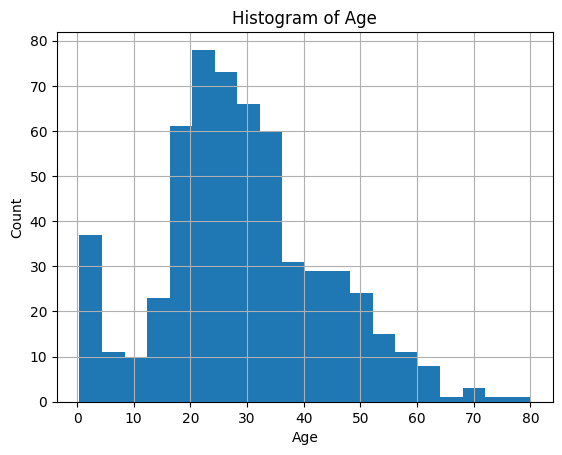

In [195]:
X_train['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

<Axes: xlabel='Age'>

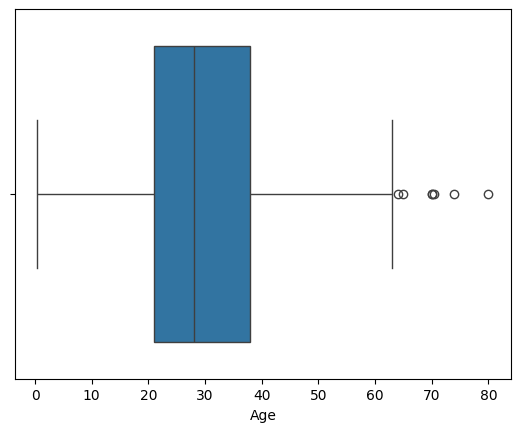

In [196]:
sns.boxplot(x=X_train['Age'])

In [197]:
X_train['Age'].skew(), X_train['Age'].kurt()

(np.float64(0.3310017370749743), np.float64(0.1492333819804159))

## SibSp

In [198]:
X_train['SibSp'].describe()

count    712.000000
mean       0.553371
std        1.176404
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [199]:
X_train['SibSp'].mode()

0    0
Name: SibSp, dtype: int64

In [200]:
X_train['SibSp'].median()

np.float64(0.0)

In [201]:
X_train['SibSp'].value_counts() / len(X_train) * 100

SibSp
0    67.977528
1    23.033708
2     3.230337
4     2.247191
3     1.825843
8     0.983146
5     0.702247
Name: count, dtype: float64

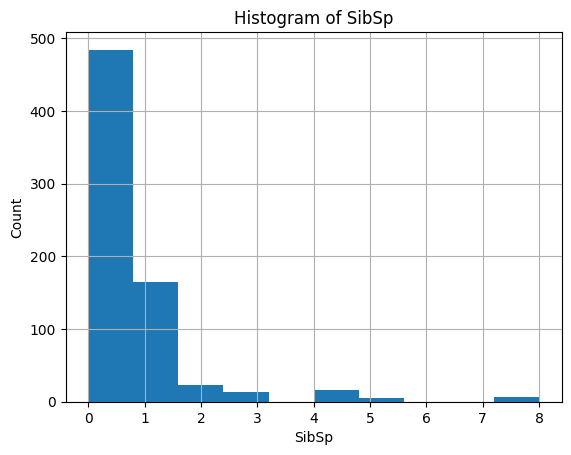

In [202]:
X_train['SibSp'].hist(bins=10)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Histogram of SibSp')
plt.show()

<Axes: xlabel='SibSp'>

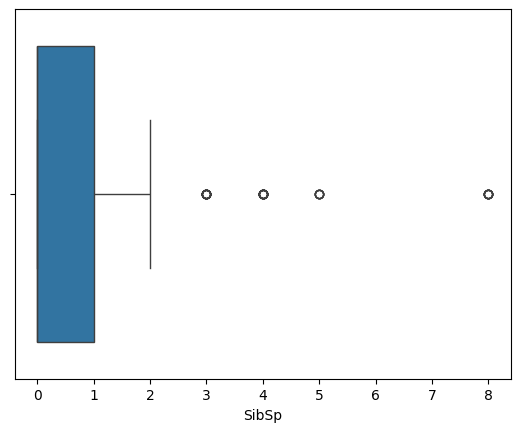

In [203]:
sns.boxplot(x=X_train['SibSp'])

## Parch

In [204]:
X_train['Parch'].describe()

count    712.000000
mean       0.379213
std        0.791669
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [205]:
X_train['Parch'].median()

np.float64(0.0)

In [206]:
X_train['Parch'].mode()

0    0
Name: Parch, dtype: int64

In [207]:
X_train['Parch'].value_counts() / len(df) * 100

Parch
0    60.718294
1    10.549944
2     7.519641
4     0.336700
3     0.336700
5     0.336700
6     0.112233
Name: count, dtype: float64

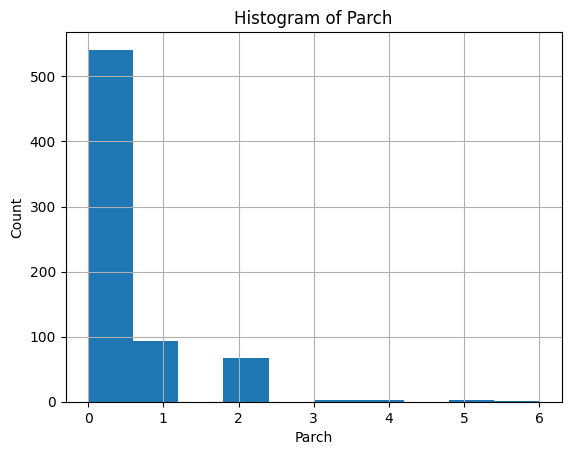

In [208]:
X_train['Parch'].hist(bins=10)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Histogram of Parch')
plt.show()

<Axes: xlabel='Parch'>

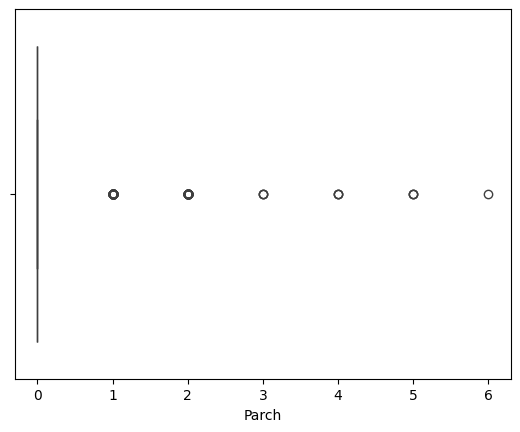

In [209]:
sns.boxplot(x=X_train['Parch'])

## Fare

In [210]:
X_train['Fare'].describe()

count    712.000000
mean      32.586276
std       51.969529
min        0.000000
25%        7.925000
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [211]:
X_train['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [212]:
X_train['Fare'].median()

np.float64(14.4542)

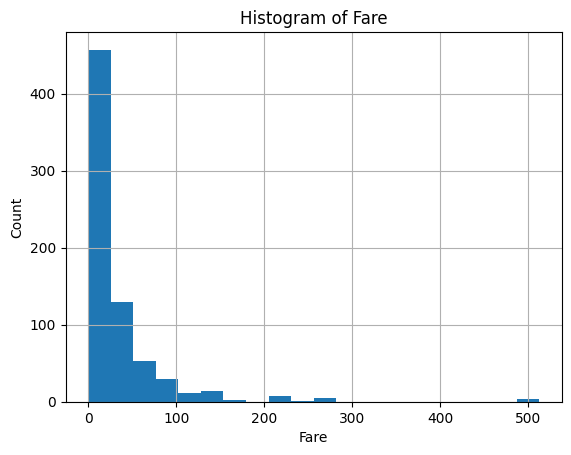

In [213]:
X_train['Fare'].hist(bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()

<Axes: xlabel='Fare'>

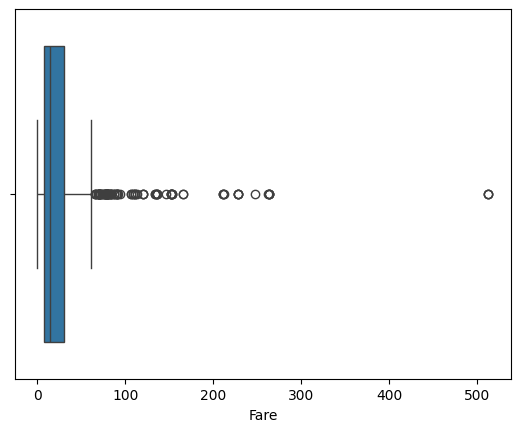

In [214]:
sns.boxplot(x=X_train['Fare'])

## Embarked

In [215]:
X_train['Embarked'].value_counts()

Embarked
S    525
C    125
Q     60
Name: count, dtype: int64

In [216]:
X_train['Embarked'].value_counts() / len(X_train) * 100

Embarked
S    73.735955
C    17.556180
Q     8.426966
Name: count, dtype: float64

Text(0.5, 1.0, 'Bar plot of Embarked')

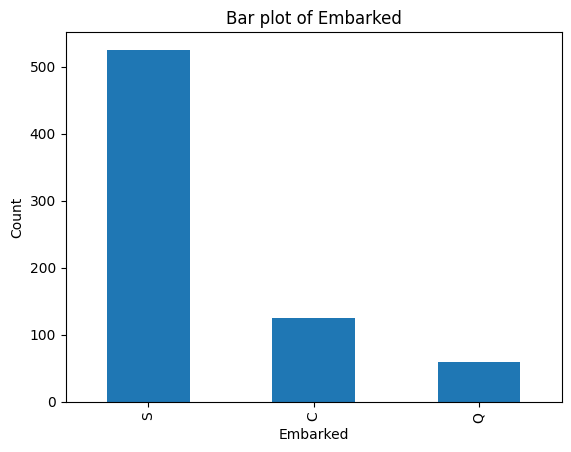

In [217]:
X_train['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Bar plot of Embarked')

# Multivariate Analysis

## Survived Vs Pclass

In [218]:
pd.crosstab(X_train['Pclass'], X_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,64,99,163
2,78,73,151
3,302,96,398
All,444,268,712


In [219]:
pd.crosstab(X_train['Pclass'], X_train['Survived'], normalize='index') * 100


Survived,0,1
Pclass,,
1,39.263804,60.736196
2,51.655629,48.344371
3,75.879397,24.120603


In [220]:
X_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.607362
2    0.483444
3    0.241206
Name: Survived, dtype: float64

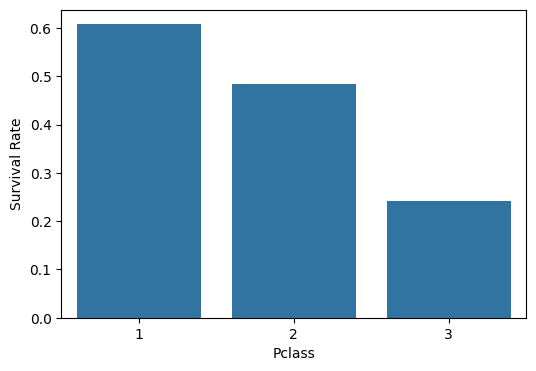

In [221]:
survival_rate = X_train.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=survival_rate, x='Pclass', y='Survived')
plt.ylabel('Survival Rate')
plt.show()

## Survived Vs Sex

In [222]:
pd.crosstab(X_train['Sex'], X_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,64,181,245
male,380,87,467
All,444,268,712


In [223]:
pd.crosstab(X_train['Sex'], X_train['Survived'], normalize='index') * 100

Survived,0,1
Sex,,
female,26.122449,73.877551
male,81.370450,18.629550


In [224]:
X_train.groupby('Sex')['Survived'].mean()

Sex
female    0.738776
male      0.186296
Name: Survived, dtype: float64

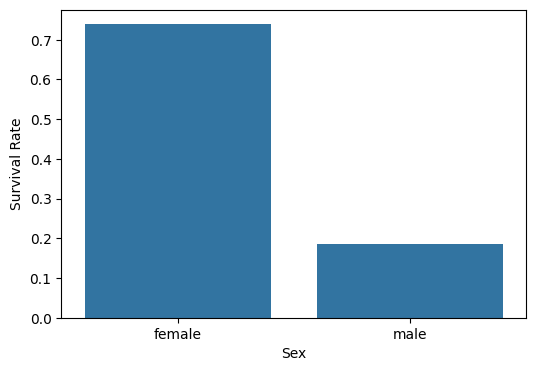

In [225]:
survival_rate = X_train.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=survival_rate, x='Sex', y='Survived')
plt.ylabel('Survival Rate')
plt.show()

## Survived Vs Age

In [226]:
X_train.groupby('Survived')['Age'].mean()

Survived
0    30.213235
1    28.451897
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age by Survival')

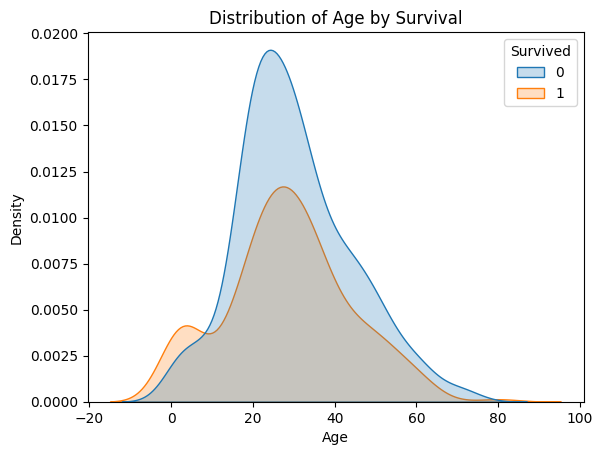

In [227]:
sns.kdeplot(data=X_train, x='Age', hue='Survived', fill=True)
plt.title('Distribution of Age by Survival')

Text(0.5, 1.0, 'Age vs Survival')

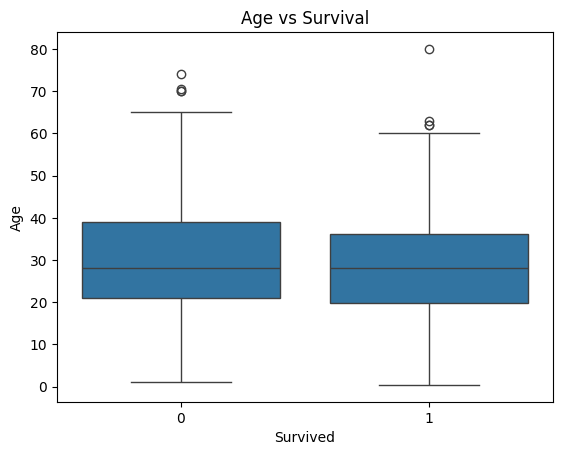

In [228]:
sns.boxplot(x='Survived', y='Age', data=X_train)
plt.title('Age vs Survival')


## Survived Vs SibSp

In [229]:
pd.crosstab(X_train['SibSp'], X_train['Survived'], margins=True)

Survived,0,1,All
SibSp,,,
0,317,167,484
1,81,83,164
2,12,11,23
3,9,4,13
4,13,3,16
5,5,0,5
8,7,0,7
All,444,268,712


In [230]:
pd.crosstab(X_train['SibSp'], X_train['Survived'], normalize='index') * 100

Survived,0,1
SibSp,,
0,65.495868,34.504132
1,49.390244,50.609756
2,52.173913,47.826087
3,69.230769,30.769231
4,81.250000,18.750000
5,100.000000,0.000000
8,100.000000,0.000000


In [231]:
X_train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345041
1    0.506098
2    0.478261
3    0.307692
4    0.187500
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by SibSp')

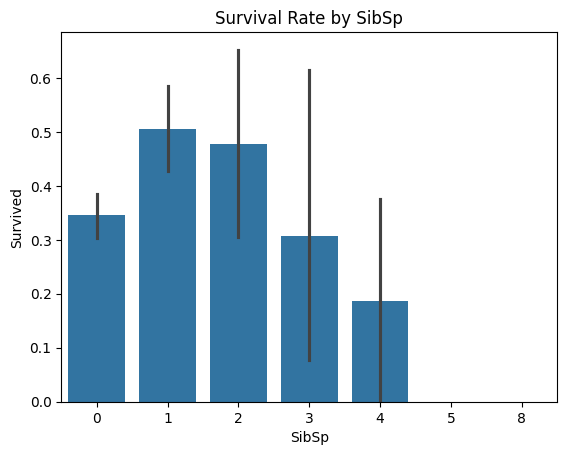

In [232]:
sns.barplot(x='SibSp', y='Survived', data=X_train)
plt.title('Survival Rate by SibSp')


## Survived Vs Parch

In [233]:
pd.crosstab(X_train['Parch'], X_train['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,358,183,541
1,44,50,94
2,35,32,67
3,0,3,3
4,3,0,3
5,3,0,3
6,1,0,1
All,444,268,712


In [234]:
pd.crosstab(X_train['Parch'], X_train['Survived'], normalize='index') * 100

Survived,0,1
Parch,,
0,66.173752,33.826248
1,46.808511,53.191489
2,52.238806,47.761194
3,0.000000,100.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000


In [235]:
X_train.groupby('Parch')['Survived'].mean()

Parch
0    0.338262
1    0.531915
2    0.477612
3    1.000000
4    0.000000
5    0.000000
6    0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Parch')

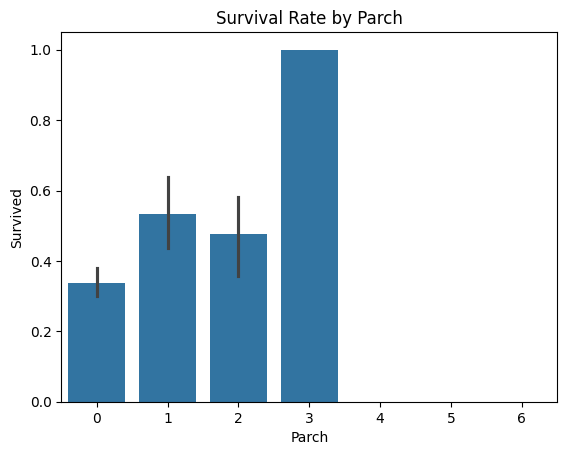

In [236]:
sns.barplot(x='Parch', y='Survived', data=X_train)
plt.title('Survival Rate by Parch')

## Survived Vs Fare

In [237]:
X_train.groupby('Survived')['Fare'].mean()

Survived
0    22.634871
1    49.072933
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Distribution of Fare by Survival')

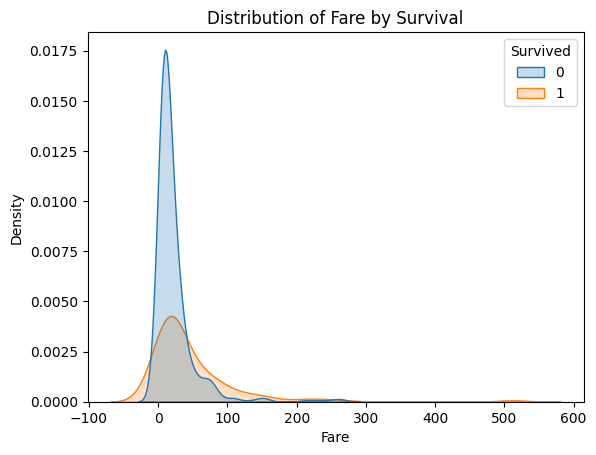

In [238]:
sns.kdeplot(data=X_train, x='Fare', hue='Survived', fill=True)
plt.title('Distribution of Fare by Survival')

Text(0.5, 1.0, 'Fare vs Survival')

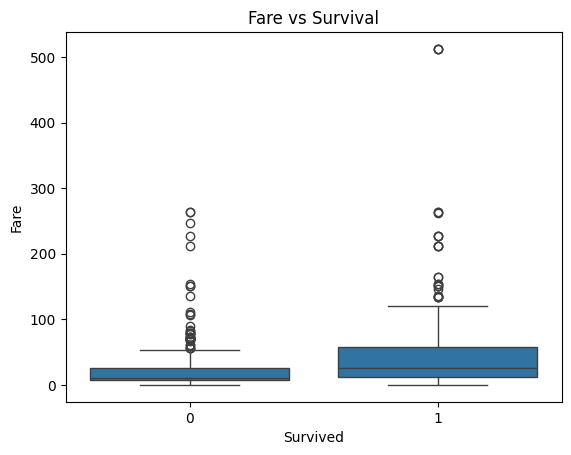

In [239]:
sns.boxplot(x='Survived', y='Fare', data=X_train)
plt.title('Fare vs Survival')

## Survived Vs Embarked

In [240]:
pd.crosstab(X_train['Embarked'], X_train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,57,68,125
Q,38,22,60
S,349,176,525
All,444,266,710


In [241]:
pd.crosstab(X_train['Embarked'], X_train['Survived'], normalize='index') * 100

Survived,0,1
Embarked,,
C,45.600000,54.400000
Q,63.333333,36.666667
S,66.476190,33.523810


In [242]:
X_train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.544000
Q    0.366667
S    0.335238
Name: Survived, dtype: float64

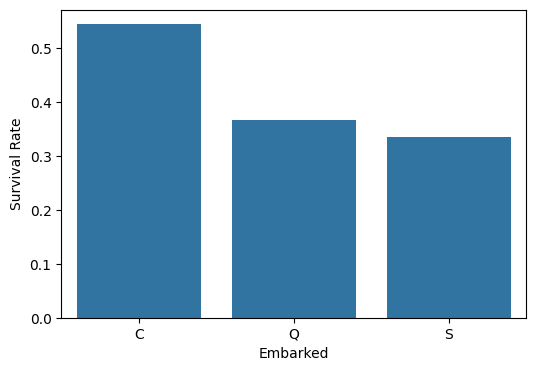

In [243]:
survival_rate = X_train.groupby('Embarked')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=survival_rate, x='Embarked', y='Survived')
plt.ylabel('Survival Rate')
plt.show()

## Correlation Matrix Heatmap

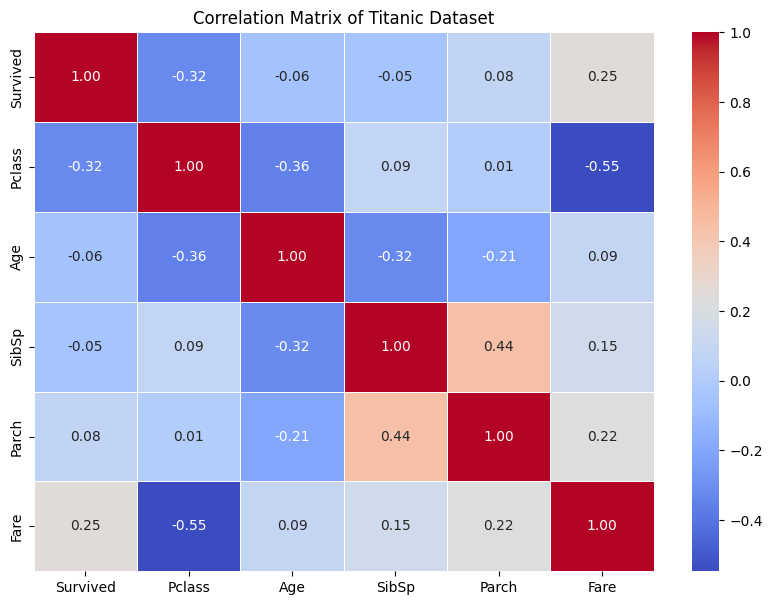

In [244]:
numeric_df = X_train.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId'])

corr = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()

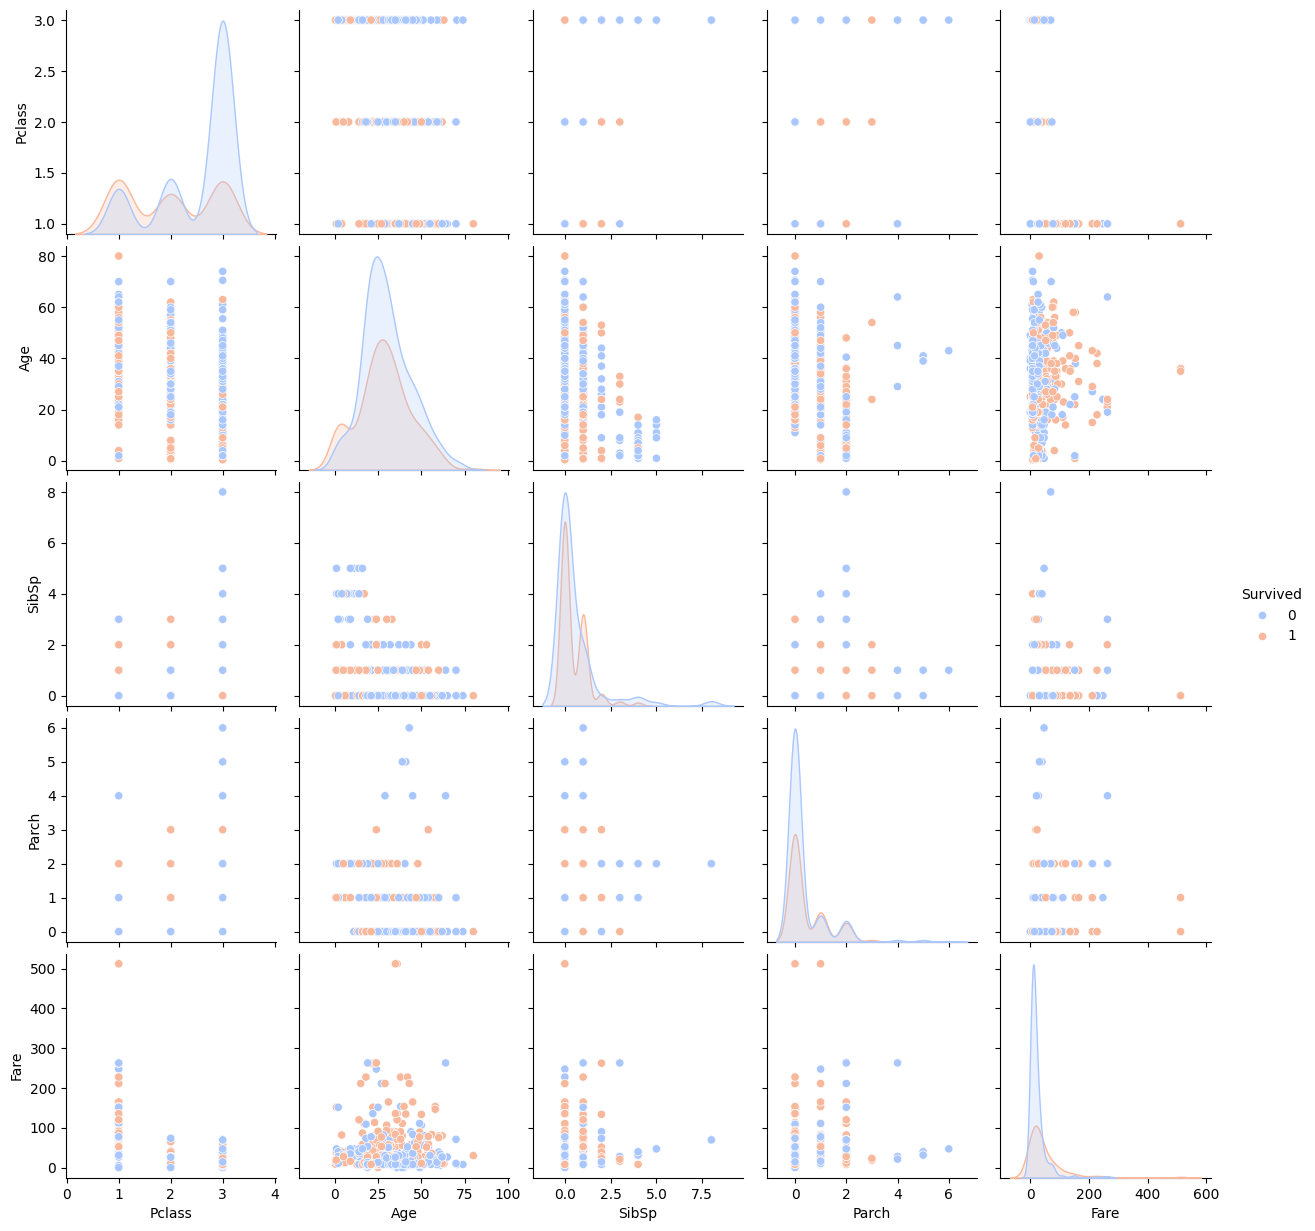

In [245]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

sns.pairplot(X_train[cols], diag_kind='kde', hue='Survived', palette='coolwarm')
plt.show()

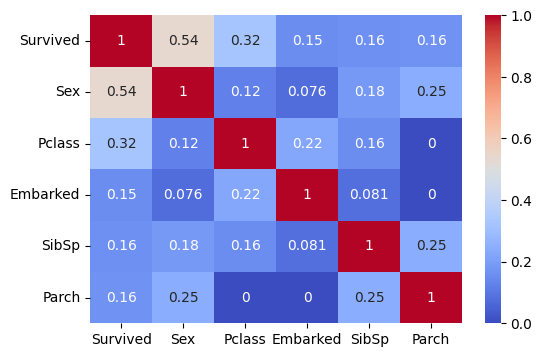

In [246]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

cat_cols = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
cramers_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), 
                              index=cat_cols, columns=cat_cols)

for i in cat_cols:
    for j in cat_cols:
        cramers_matrix.loc[i, j] = cramers_v(X_train[i], X_train[j])

plt.figure(figsize=(6,4))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm')
plt.show()

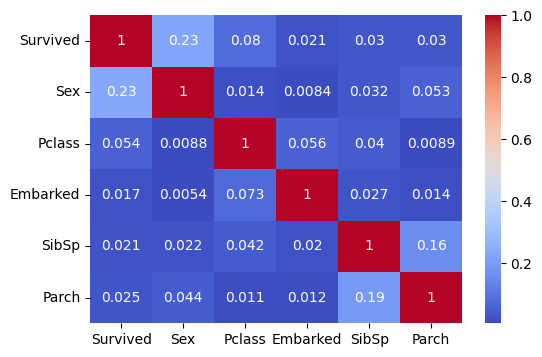

In [247]:
from math import log

def conditional_entropy(x, y):
    y_values = y.value_counts(normalize=True)
    xy = pd.crosstab(x, y, normalize='columns')
    ent = 0
    for c in y_values.index:
        sub = xy[c]
        ent += y_values[c] * (-np.nansum(sub * np.log2(sub + 1e-9)))
    return ent

def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_entropy = -np.nansum(x.value_counts(normalize=True) * 
                           np.log2(x.value_counts(normalize=True) + 1e-9))
    if x_entropy == 0:
        return 1
    return (x_entropy - s_xy) / x_entropy

cat_cols = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
theils_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), 
                             index=cat_cols, columns=cat_cols)

for i in cat_cols:
    for j in cat_cols:
        theils_matrix.loc[i, j] = theils_u(X_train[i], X_train[j])

plt.figure(figsize=(6,4))
sns.heatmap(theils_matrix, annot=True, cmap='coolwarm')
plt.show()

In [248]:
X_train.to_csv('../data/split/train.csv', index=False)
X_test.to_csv('../data/split/test.csv', index=False)